In [1]:
import BondGraphTools as bgt
import math

In [2]:
model=bgt.new(name='branching vessel')

In [3]:
SE=bgt.new("Se",value=9.331*1e6)
SF1=bgt.new("Sf",value=7.998*1e6)
SF2=bgt.new("Sf",value=7.998*1e6)

C1=bgt.new("C", value=0.60015*1e-6)
C2=bgt.new("C", value=0.125281*1e-6)
C3=bgt.new("C", value=0.1125281*1e-6)

R1=bgt.new("R", value=1.333*1e6)
R2=bgt.new("R", value=10.564*1e6)
R3=bgt.new("R", value=10.664*1e6)

L1=bgt.new("I", value=0.123*1e6)
L2=bgt.new("I", value=0.08665*1e6)
L3=bgt.new("I", value=0.06665*1e6)

In [4]:
zero_junc1=bgt.new("0")
zero_junc2=bgt.new("0")
zero_junc3=bgt.new("0")

one_junc1=bgt.new("1")
one_junc2=bgt.new("1")
one_junc3=bgt.new("1")

In [5]:
bgt.add(model,SE,SF1,SF2,C1,C2,C3,R1,R2,R3,L1,L2,L3,zero_junc1,zero_junc2,zero_junc3,one_junc1,one_junc2,one_junc3)

In [6]:
bgt.connect(SE,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,L1)
bgt.connect(one_junc1,zero_junc1)
bgt.connect(zero_junc1,C1)
bgt.connect(zero_junc1,one_junc2)
bgt.connect(zero_junc1,one_junc3)
bgt.connect(one_junc2,R2)
bgt.connect(one_junc2,L2)
bgt.connect(one_junc2,zero_junc2)
bgt.connect(zero_junc2,C2)
bgt.connect(zero_junc2,SF1)
bgt.connect(one_junc3,L3)
bgt.connect(one_junc3,R3)
bgt.connect(one_junc3,zero_junc3)
bgt.connect(zero_junc3,C3)
bgt.connect(zero_junc3,SF2)

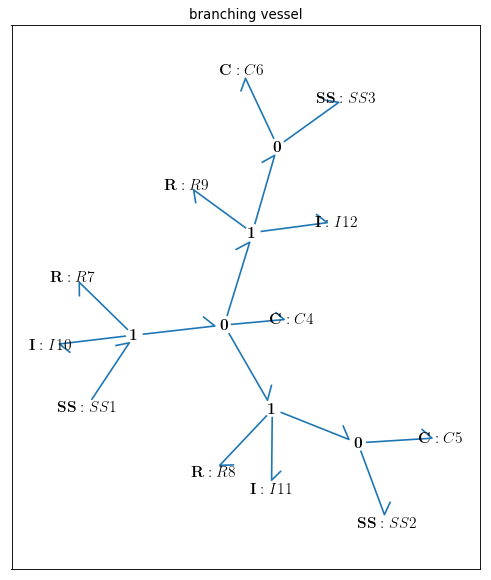

In [26]:
bgt.draw(model)

In [8]:
timespan=[0,20]

In [9]:
model.state_vars

{'x_0': (C: C4, 'q_0'),
 'x_1': (C: C5, 'q_0'),
 'x_2': (C: C6, 'q_0'),
 'x_3': (I: I10, 'p_0'),
 'x_4': (I: I11, 'p_0'),
 'x_5': (I: I12, 'p_0')}

In [10]:
x0={"x_0":10*1e-6, "x_1":4*1e-6, "x_2":4*1e-6, "x_3":0, "x_4":0, "x_5":0}

In [11]:
model.constitutive_relations

[dx_0 - 813008130081301*x_3/100000000000000000000 + 115406809001731*x_4/10000000000000000000 + 2344336084021*x_5/156250000000000000,
 dx_1 - 115406809001731*x_4/10000000000000000000 - 7998000,
 dx_2 - 2344336084021*x_5/156250000000000000 - 7998000,
 dx_3 + 166625010414063*x_0/100000000 + 108373983739837*x_3/10000000000000 - 9331000,
 dx_4 - 166625010414063*x_0/100000000 + 798205633735363*x_1/100000000 + 121915753029429*x_4/1000000000000,
 dx_5 - 166625010414063*x_0/100000000 + 888666919640517*x_2/100000000 + 160*x_5]

In [12]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)
# t, x = bgt.simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':1, 'u_1':0})

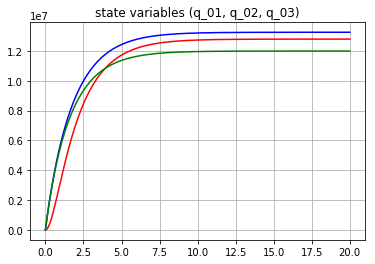

In [33]:
# plotting state variables in 3 capacitors (q)
import matplotlib.pyplot as plt
for sv, c in [(x[:,0],'r'), (x[:,1],'b'), (x[:,2],'g')]:
    fig=plt.plot(t,sv,c)
    plt.title("state variables (q_01, q_02, q_03)")
    plt.grid()

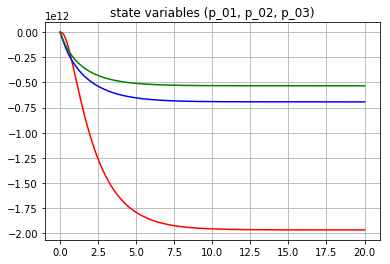

In [35]:
# plotting state variables in 3 inductors (v)
import matplotlib.pyplot as plt
for sv, c in [(x[:,3],'r'), (x[:,4],'b'), (x[:,5],'g')]:
    fig=plt.plot(t,sv,c)
    plt.title("state variables (p_01, p_02, p_03)")
    plt.grid()

In [14]:
# Calculating the current & potential in C1
#  dq_C1/dt = v_C1 (current)
# u_C1=1/C*(q_C1)

import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C1=slope

u_C1=(1/C1._params['C'])*x[:,0]



In [15]:
# Calculating the current & potential in C2
#  dq_C2/dt = v_C2 (current)
# u_C2=1/C*(q_C2)

import numpy as np
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v_C2=slope

u_C2=(1/C2._params['C'])*x[:,1]


In [16]:
# Calculating the current & potential in C3
#  dq_C3/dt = v_C3 (current)
# u_C3=1/C*(q_C3)

import numpy as np
f = np.array(x[:,2], dtype=float)
slope=np.gradient(f,0.1)
v_C3=slope

u_C3=(1/C3._params['C'])*x[:,2]


In [17]:
# Calculating the current & potential in L1
# v_L1=x[:,3]
# u_L1=L1.(v_L1)'

import numpy as np
f = np.array(x[:,3], dtype=float)
slope=np.gradient(f,0.1)
dv_L1=slope
u_L1=L1._params['L']*dv_L1

v_L1=x[:,3]


In [18]:
# Calculating the current & potential in L2
# v_L2=x[:,4]
# u_L2=L2.(v_L2)'

import numpy as np
f = np.array(x[:,4], dtype=float)
slope=np.gradient(f,0.1)
dv_L2=slope
u_L2=L2._params['L']*dv_L2

v_L2=x[:,4]

In [19]:
# Calculating the current & potential in L3
# v_L3=x[:,5]
# u_L3=L3.(v_L3)'

import numpy as np
f = np.array(x[:,5], dtype=float)
slope=np.gradient(f,0.1)
dv_L3=slope
u_L3=L3._params['L']*dv_L3

v_L3=x[:,5]

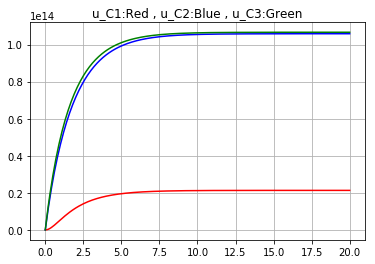

In [20]:
# plotting the potentials in the three capacitors
for u, c in [(u_C1,'r'), (u_C2,'b'), (u_C3,'g')]:
    fig=plt.plot(t,u,c)
    plt.title("u_C1:Red , u_C2:Blue , u_C3:Green")
    plt.grid()


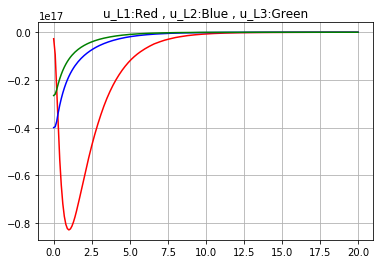

In [21]:
# plotting the potentials in the three Inductors
for u, c in [(u_L1,'r'), (u_L2,'b'), (u_L3,'g')]:
    fig=plt.plot(t,u,c)
    plt.title("u_L1:Red , u_L2:Blue , u_L3:Green")
    plt.grid()

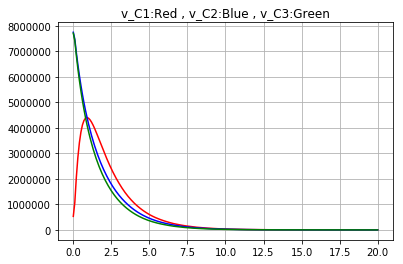

In [22]:
# plotting the currents in the three capacitors
for v, c in [(v_C1,'r'), (v_C2,'b'), (v_C3,'g')]:
    fig=plt.plot(t,v,c)
    plt.title("v_C1:Red , v_C2:Blue , v_C3:Green")
    plt.grid()

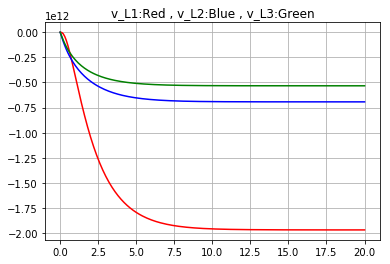

In [23]:
# plotting the currents in the three inductors
for v, c in [(v_L1,'r'), (v_L2,'b'), (v_L3,'g')]:
    fig=plt.plot(t,v,c)
    plt.title("v_L1:Red , v_L2:Blue , v_L3:Green")
    plt.grid()

In [24]:
#print(E1.__dict__)
#print('\n')
#print(E1._params['C'])

In [25]:
# C2.__dict__